In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### EDA


In [10]:
train_df.shape
train_df.info()
train_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
train_df['y'].value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

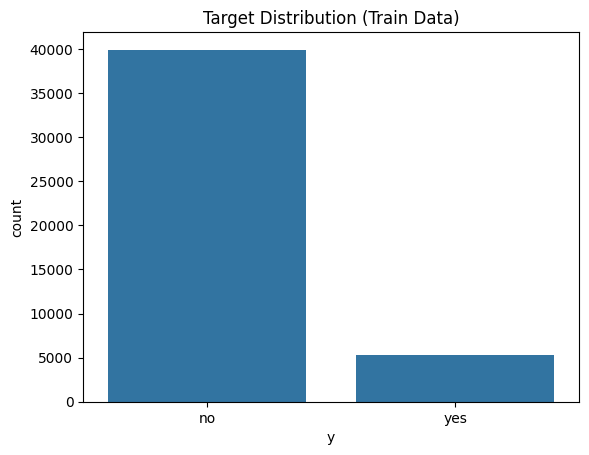

In [13]:
sns.countplot(x='y', data=train_df)
plt.title("Target Distribution (Train Data)")
plt.show()

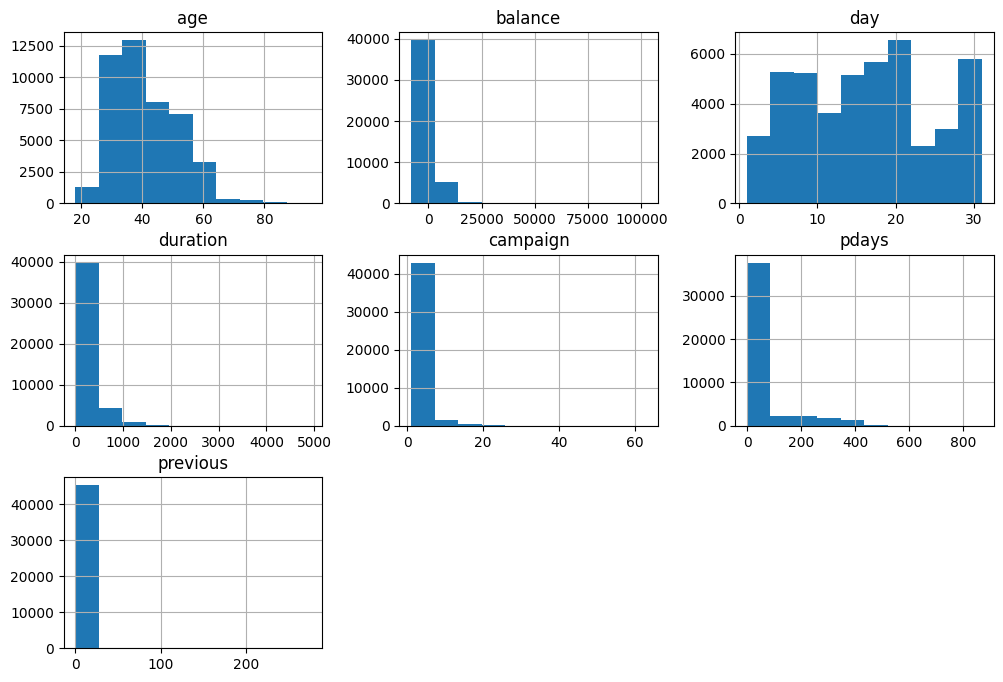

In [14]:
num_cols = train_df.select_dtypes(exclude='object').columns
train_df[num_cols].hist(figsize=(12,8))
plt.show()

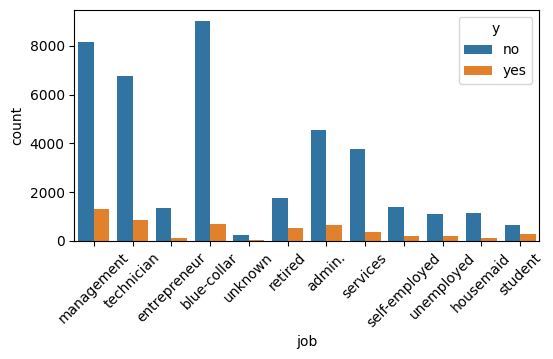

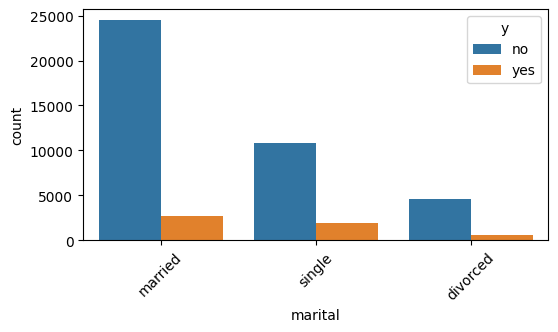

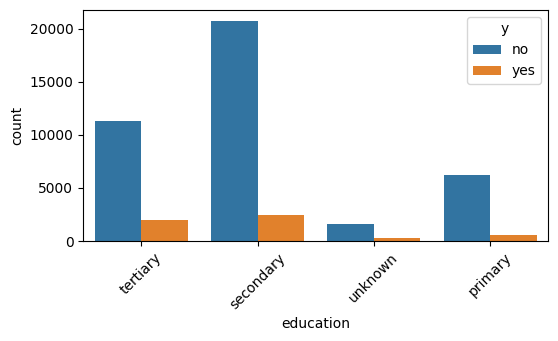

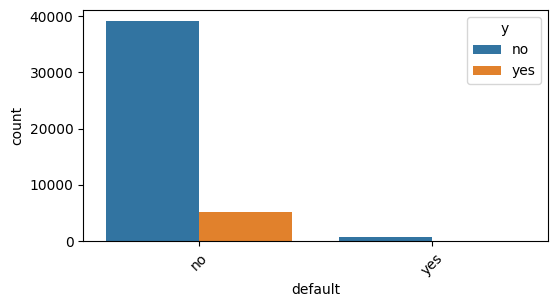

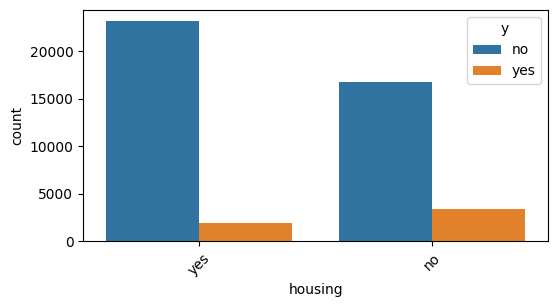

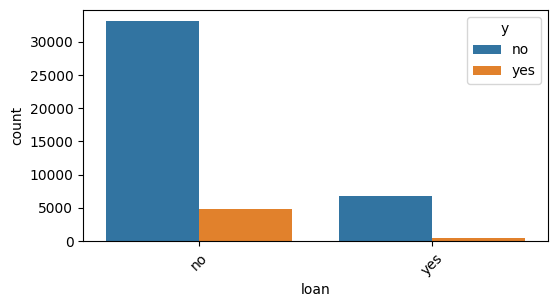

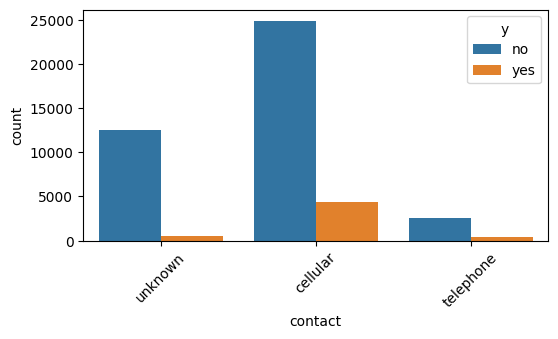

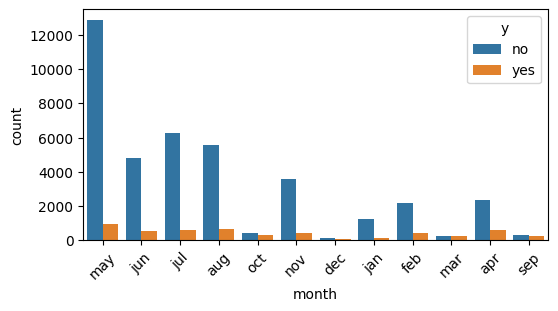

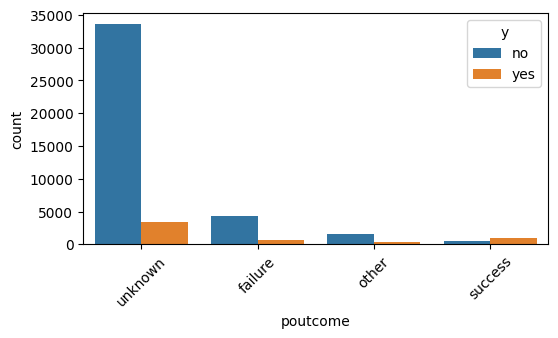

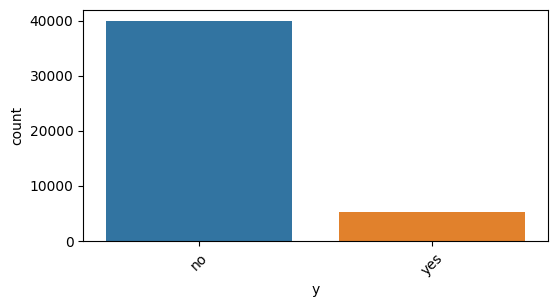

In [18]:
cat_cols = train_df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='y', data=train_df)
    plt.xticks(rotation=45)
    plt.show()

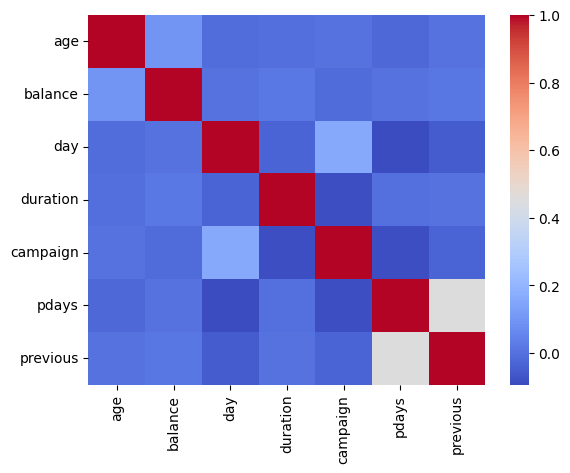

In [16]:
sns.heatmap(train_df[num_cols].corr(), cmap="coolwarm")
plt.show()

## EDA Summary

- The training dataset is imbalanced, with a smaller proportion of customers
  subscribing to term deposits.
- Numerical features such as `duration` show strong relationships with the target.
- Several categorical variables demonstrate clear differences between
  subscribers and non-subscribers.
- The test dataset will be used only for final predictions after model training.
